# Texas Licenses

We originall got our dataset from the [License Files page](https://www.license.state.tx.us/licensesearch/licfile.asp) from the Texas Department of Licensing and Regulation, but they've changed around since then! I'm pretty sure it's [this dataset](https://www.opendatanetwork.com/dataset/data.texas.gov/7358-krk7), but we'll just use a local version instead of the most current.

# PART ONE: OPENING UP OUR DATASET

## 0. Do your setup

Import what you need to import, etc.

In [19]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Open the file

We'll start with `licfile.csv`, which is a list of licenses.

In [20]:
df = pd.read_csv("licfile.csv", )
df

,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,08102017,"RISINGER, JIM MARVIN.1",7668 S US HWY 59,Unnamed: 11,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,Unnamed: 17,N
0,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,183.0,GREGG,75662,9039187899,NaN,N
1,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,9262017,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,493.0,WILSON,78147,NaN,NaN,N
2,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,11042017,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,201.0,HARRIS,77076,7136445566,NaN,N
3,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2252018,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,27.0,BELL,76511,2549852228,NaN,N
4,Associate Auctioneer,15650,OUT OF STATE,"THOMPSON, RANDY D",NaN,NaN,NaN,NaN,5042017,"THOMPSON, RANDY D",10995 BELLEVILLE RD,NaN,RINGLING OK 73456,999.0,OUT OF STATE,73456,5802765961,NaN,N
5,Associate Auctioneer,15698,OUT OF STATE,"TUCKER, MONTE EARL",NaN,NaN,NaN,NaN,6162017,"TUCKER, MONTE EARL",19139 HIGHWAY 6,NaN,SAYRE OK 73662-6080,999.0,OUT OF STATE,73662,5802250269,NaN,N
6,Associate Auctioneer,15810,MILAM,"COOPER, THOMAS JAMES",NaN,NaN,NaN,NaN,3182017,"COOPER, THOMAS JAMES",346 MAIN ST,NaN,ROSEBUD TX 76570,145.0,FALLS,76570,2815078713,NaN,N
7,Associate Auctioneer,15835,OUT OF STATE,"BLANKENSHIP, KERRY NEIL",NaN,NaN,NaN,NaN,5042017,"BLANKENSHIP, KERRY NEIL",10664 BELLEVILLE RD,NaN,RINGLING OK 73456-2014,999.0,OUT OF STATE,73456,5802765961,NaN,N
8,Associate Auctioneer,16784,OUT OF STATE,"DAWES, NICHOLAS MORGAN",NaN,NaN,NaN,NaN,10192017,"DAWES, NICHOLAS MORGAN",3500 MAPLE AVENUE 17TH FLOOR,NaN,DALLAS TX 75219,113.0,DALLAS,75219,2144091137,NaN,N
9,Associate Auctioneer,16893,LAMAR,"LESTER, TIMMY EUGENE",NaN,NaN,NaN,NaN,8192017,"LESTER, TIMMY EUGENE",167 COUNTY ROAD 16380,NaN,CUNNINGHAM TX 75434,277.0,LAMAR,75434,9037825759,NaN,N


## 2. That looks terrible, let's add column names.

It apparently doesn't have headers! **Read the file in again, but setting your own column names**. Their [current data dictionary might not perfectly match](https://www.opendatanetwork.com/dataset/data.texas.gov/7358-krk7), but you can use it to understand what the columns are. For the dataset we're using, the order goes like this:

* LICTYPE
* LICNUMBER
* BIZCOUNTY
* BIZNAME
* BIZLINE1
* BIZLINE2
* BIZCITYSTATE
* BIZTELEPHONE
* EXPIRATION
* OWNER
* MAILLINE1
* MAILLINE2
* MAILCITYSTATE
* MAILCOUNTYCODE
* MAILCOUNTY
* MAILZIP
* TELEPHONE
* LICSUBTYPE
* CEFLAG

**Note:** You can rename the columns to things that make sense - "expiration" is a little more manageable than "LICENSE EXPIRATION DATE (MMDDCCYY)". I've named my License Type column LICTYPE, so if you haven't you'll have to change the rest of my sample code to match.

In [21]:
df = pd.read_csv("licfile.csv", names = ['lictype', 'licnumber','bizcounty','bizname',
                                         'bizline1','bizline2','bizcitystate','biztelephone',
                                         'expiration','owner','mailline1','mailline2','mailcitystate',
                                         'mailcountycode','mailcounty','mailzip','telephone','licsubtype','ceflag'])

In [22]:
df

,lictype,licnumber,bizcounty,bizname,bizline1,bizline2,bizcitystate,biztelephone,expiration,owner,mailline1,mailline2,mailcitystate,mailcountycode,mailcounty,mailzip,telephone,licsubtype,ceflag
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,8102017,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,347.0,NACOGDOCHES,75964,9363665745,NaN,N
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,183.0,GREGG,75662,9039187899,NaN,N
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,9262017,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,493.0,WILSON,78147,NaN,NaN,N
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,11042017,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,201.0,HARRIS,77076,7136445566,NaN,N
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2252018,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,27.0,BELL,76511,2549852228,NaN,N
5,Associate Auctioneer,15650,OUT OF STATE,"THOMPSON, RANDY D",NaN,NaN,NaN,NaN,5042017,"THOMPSON, RANDY D",10995 BELLEVILLE RD,NaN,RINGLING OK 73456,999.0,OUT OF STATE,73456,5802765961,NaN,N
6,Associate Auctioneer,15698,OUT OF STATE,"TUCKER, MONTE EARL",NaN,NaN,NaN,NaN,6162017,"TUCKER, MONTE EARL",19139 HIGHWAY 6,NaN,SAYRE OK 73662-6080,999.0,OUT OF STATE,73662,5802250269,NaN,N
7,Associate Auctioneer,15810,MILAM,"COOPER, THOMAS JAMES",NaN,NaN,NaN,NaN,3182017,"COOPER, THOMAS JAMES",346 MAIN ST,NaN,ROSEBUD TX 76570,145.0,FALLS,76570,2815078713,NaN,N
8,Associate Auctioneer,15835,OUT OF STATE,"BLANKENSHIP, KERRY NEIL",NaN,NaN,NaN,NaN,5042017,"BLANKENSHIP, KERRY NEIL",10664 BELLEVILLE RD,NaN,RINGLING OK 73456-2014,999.0,OUT OF STATE,73456,5802765961,NaN,N
9,Associate Auctioneer,16784,OUT OF STATE,"DAWES, NICHOLAS MORGAN",NaN,NaN,NaN,NaN,10192017,"DAWES, NICHOLAS MORGAN",3500 MAPLE AVENUE 17TH FLOOR,NaN,DALLAS TX 75219,113.0,DALLAS,75219,2144091137,NaN,N


# 3. Force string columns to be strings

The county code and expiration dates are being read in as numbers, which is going to cause some trouble later on. You can force a column to be a certain type (most usually strings) when reading it in with the following code:

    df = pd.read_csv("your-filename.csv", dtype={"colname1": str, "colname2": str})

You don't need to do it for every column, just the ones you want to force!

**Re-import the file, forcing the expiration date, license number, mailing address county code, mailing zip code and telephone to all be strings.**

In [23]:
df.dtypes

lictype            object
licnumber          object
bizcounty          object
bizname            object
bizline1          float64
bizline2          float64
bizcitystate      float64
biztelephone      float64
expiration          int64
owner              object
mailline1          object
mailline2          object
mailcitystate      object
mailcountycode    float64
mailcounty         object
mailzip            object
telephone          object
licsubtype         object
ceflag             object
dtype: object

In [24]:
df = pd.read_csv("licfile.csv", 
names = ['lictype', 'licnumber','bizcounty','bizname','bizline1','bizline2','bizcitystate','biztelephone','expiration','owner','mailline1','mailline2','mailcitystate','mailcountycode','mailcounty','mailzip','telephone','licsubtype','ceflag'],
dtype={'bizline1': str,'bizline2': str,'bizcitystate':str,'biztelephone':str,'expiration':str,'mailcountycode':str})

Check the data types of your columns to be sure! If you do it right they'll be `object` (not `str`, oddly).

In [25]:
df.dtypes

lictype           object
licnumber         object
bizcounty         object
bizname           object
bizline1          object
bizline2          object
bizcitystate      object
biztelephone      object
expiration        object
owner             object
mailline1         object
mailline2         object
mailcitystate     object
mailcountycode    object
mailcounty        object
mailzip           object
telephone         object
licsubtype        object
ceflag            object
dtype: object

In [26]:
df.shape

(597816, 19)

## 4. Convert those expiration dates from MMDDYYYY to YYYY-MM-DD

List slicing forever! It's the thing with the `[]`. There are like five ways to do this one.

In [27]:
y = df.expiration.str[-4:]
d = df.expiration.str[-6:-4]
m = df.expiration.str[-8:-6]

df['expiration']= y+"-"+m+"-"+d

Check the first five expirations to make sure they look right.

In [28]:
df.head()

,lictype,licnumber,bizcounty,bizname,bizline1,bizline2,bizcitystate,biztelephone,expiration,owner,mailline1,mailline2,mailcitystate,mailcountycode,mailcounty,mailzip,telephone,licsubtype,ceflag
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2017-08-10,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2017-12-29,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2017-09-26,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2017-11-04,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2018-02-25,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N


# PART TWO: LOOKING AT LICENSES

## 5. What are the top 10 most common licenses?

In [29]:
df.lictype.value_counts().head(10)

Cosmetology Operator        151206
Apprentice Electrician      110593
Cosmetology Manicurist       49563
Journeyman Electrician       38170
A/C Technician               27959
Cosmetology Esthetician      23613
Cosmetology Beauty Salon     23577
Master Electrician           16810
A/C Contractor               16376
Barber, Class A              16019
Name: lictype, dtype: int64

## 6. What are the top 10 least common?

In [30]:
df.lictype.value_counts().tail(10)

Elevator Responsible Party CE Provider             8
Mobile Cosmetology Esthetician Specialty Saloon    5
Barber Hair Braiding Shop                          4
Barber Hair Weaving Shop                           4
Booting CE Provider                                3
Cosmetology Wig Instructor                         2
Mobile Cosmetology Manicure Specialty Saloon       2
Mobile Cosmetology Esthetician/Manicure Saloon     2
Licensed Court Interpreter CE Provider             2
Legal Service Contract Admin                       1
Name: lictype, dtype: int64

## 7. Try to select everyone who is any type of electrician.

You're going to get an error about `"cannot index with vector containing NA / NaN values"`. Let's work our way in there.

In [31]:
# # Yes I know I left this in here, it's a learning experience!
# df[df['lictype'].str.contains("Electrician")]

## 8. How many of the rows of LICTYPE are NaN?

In [32]:
df.lictype.str.contains('Electrician').value_counts()

False    418892
True     171838
Name: lictype, dtype: int64

Over 7000 licenses don't have types! As a result, when we look for license types with electricians - aka do `df['LICTYPE'].str.contains("Electrician")` - we get three results:

* `True` means `LICTYPE` exists and contains `"Electrician"`
* `False` means `LICTYPE` exists and does not contain `"Electrician"`
* `NaN` means `LICTYPE` does not exist for that row

## 9. Actually getting everyone who is an electrician

In [33]:
df[df['lictype'].str.contains("Electrician").fillna(False)]

,lictype,licnumber,bizcounty,bizname,bizline1,bizline2,bizcitystate,biztelephone,expiration,owner,mailline1,mailline2,mailcitystate,mailcountycode,mailcounty,mailzip,telephone,licsubtype,ceflag
47025,Apprentice Electrician,30244,ROBERTSON,"BOLTON, MARION N",NaN,NaN,NaN,NaN,2017-05-27,"BOLTON, MARION N",2262 HARBOR BOLTON RD,NaN,FRANKLIN TX 77856-5367,0395,ROBERTSON,77856,9798284713,AE,N
47026,Apprentice Electrician,30798,BEXAR,"GONZALEZ, FELIX G JR",NaN,NaN,NaN,NaN,2017-10-21,"GONZALEZ, FELIX G JR",8507 TIMBER BELT,NaN,SAN ANTONIO TX 78250-4478,0029,BEXAR,78250,2104887491,AE,N
47027,Apprentice Electrician,30802,HARRIS,"HERNANDEZ, RUFINO",NaN,NaN,NaN,NaN,2017-05-28,"HERNANDEZ, RUFINO",1719 ROBINHOOD ST,NaN,PASADENA TX 77502-2218,0201,HARRIS,77502,7133824802,AE,N
47028,Apprentice Electrician,31875,TITUS,"COPELAND, MARCUS A",NaN,NaN,NaN,NaN,2016-06-18,"COPELAND, MARCUS A",201 N MADISON AVE,NaN,MOUNT PLEASANT TX 75455-3944,0449,TITUS,75455,9035634950,AE,N
47029,Apprentice Electrician,31876,TITUS,"ANGLIN, DAVID LEE",NaN,NaN,NaN,NaN,2016-10-26,"ANGLIN, DAVID LEE",8066 FM 1001,NaN,COOKVILLE TX 75558-3064,0449,TITUS,75558,9039462547,AE,N
47030,Apprentice Electrician,32428,HARRIS,"VALLEJO, ARMANDO E",NaN,NaN,NaN,NaN,2016-10-21,"VALLEJO, ARMANDO E",3903 ERBY ST TRLR 88,NaN,HOUSTON TX 77087-1250,0201,HARRIS,77087,8325285241,AE,N
47031,Apprentice Electrician,32440,TRAVIS,"RODRIGUEZ, REYNALDO",NaN,NaN,NaN,NaN,2017-12-14,"RODRIGUEZ, REYNALDO",10905 SHAWN LEE CV,NaN,AUSTIN TX 78753-3363,0453,TRAVIS,78753,7372474738,AE,N
47032,Apprentice Electrician,32442,CASS,"TERRY, ALAN D JR",NaN,NaN,NaN,NaN,2017-06-03,"TERRY, ALAN D JR",605 KEASLER,NaN,HUGHES SPRINGS TX 75656-2575,0067,CASS,75656,9036392017,AE,N
47033,Apprentice Electrician,32450,HARRIS,"TREVINO, ADIEL A",NaN,NaN,NaN,NaN,2017-06-11,"TREVINO, ADIEL A",3824 LYDIA ST,NaN,HOUSTON TX 77021-6125,0201,HARRIS,77021,7134406945,AE,N
47034,Apprentice Electrician,32453,GALVESTON,"ROACHELL, LAWRENCE S",NaN,NaN,NaN,NaN,2017-11-17,"ROACHELL, LAWRENCE S",115 LAUREL MEADOW CT,NaN,LA MARQUE TX 77568-2497,0167,GALVESTON,77568,4095390843,AE,N


This doesn't work when trying to select electricians, though, as NaN is a no-go for a filter. We *could* filter out everywhere the LICTYPE is null, but we could also cheat a little and say "replace all of the `NaN` values with `False` values."

`.fillna(False)` will take every `NaN` and replace it with `False`. 

## 10. What's the most popular kind of electrician?

In [34]:
df[df.lictype.str.contains("Electrician").fillna(False)].lictype.value_counts().head(1)

Apprentice Electrician    110593
Name: lictype, dtype: int64

## 11. Graph it, with the largest bar on top.

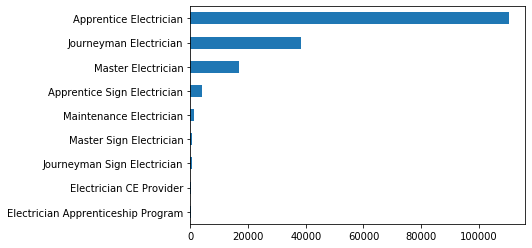

In [35]:
df[df.lictype.str.contains("Electrician").fillna(False)].lictype.value_counts().sort_values().plot(kind='barh')

## 12. How many sign electricians are there?

There are a few ways to do this one.

In [36]:
df[df.lictype.str.contains("Sign Electrician").fillna(False)].lictype.value_counts().sum()

4927

# PART THREE: LOOKING AT LAST NAMES

## 13. Extract every owner's last name

You want everything before the comma. We've done this before (in a few different ways!).

* **Hint:** If you get an error about missing or `NaN` data, you might use `.fillna('')` to replace every empty owner name with an empty string. This might not happen to you, though, depending on how you do it!

* **Hint:** You probably want to do `expand=False` on your extraction to make sure it comes out as a series instead of a dataframe.

In [37]:
df.bizname.str.split(",").str.get(0)

0            RISINGER
1            WILLIAMS
2             GUEVARA
3              BOWERS
4              DEMSKY
5            THOMPSON
6              TUCKER
7              COOPER
8         BLANKENSHIP
9               DAWES
10             LESTER
11            MANCILL
12         HUDDLESTON
13             JORDAN
14              IRWIN
15               HALL
16              JAMES
17             SIDAWI
18              SMITH
19           FERGUSON
20           MCKINLEY
21             SOWELL
22             SEVIER
23         SOMERVILLE
24           BARCLIFT
25               FORD
26            SCHAFER
27           MARTINEZ
28            CLEMANS
29           MARTINEZ
             ...     
597786        SNUFFER
597787       MARTINEZ
597788         YOSTEN
597789          CLICK
597790          PENSE
597791           LARA
597792          SMITH
597793      BINNICKER
597794         CHAVEZ
597795       GUERRERO
597796         SAVAGE
597797          ADAMS
597798          SCOTT
597799           HILL
597800    

## 14. Save the last name into a new column

Then check to make sure it exists, and you successfully saved it into the dataframe.

In [38]:
df['last_name'] = df.bizname.str.split(",").str.get(0)

In [39]:
df.head()

,lictype,licnumber,bizcounty,bizname,bizline1,bizline2,bizcitystate,biztelephone,expiration,owner,mailline1,mailline2,mailcitystate,mailcountycode,mailcounty,mailzip,telephone,licsubtype,ceflag,last_name
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2017-08-10,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N,RISINGER
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2017-12-29,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N,WILLIAMS
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2017-09-26,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N,GUEVARA
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2017-11-04,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N,BOWERS
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2018-02-25,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N,DEMSKY


# 15. What are the ten most popular last names?

In [40]:
df.last_name.value_counts().head(10)

NGUYEN       22355
TRAN          8167
GARCIA        5688
LE            5613
MARTINEZ      4809
RODRIGUEZ     4722
HERNANDEZ     4469
PHAM          4007
GONZALEZ      3693
SMITH         3351
Name: last_name, dtype: int64

## 16. What are the most popular licenses for people with the last name Nguyen? Tran? Le?

Those are the top 3 last names in Vietnam.

In [41]:
df[df.last_name == "NGUYEN"].lictype.value_counts().head(3)

Cosmetology Manicurist     12856
Cosmetology Operator        4039
Cosmetology Esthetician     2881
Name: lictype, dtype: int64

In [42]:
df[df.last_name == "TRAN"].lictype.value_counts().head(3)

Cosmetology Manicurist     4675
Cosmetology Operator       1475
Cosmetology Esthetician    1032
Name: lictype, dtype: int64

In [43]:
df[df.last_name == "LE"].lictype.value_counts().head(3)

Cosmetology Manicurist     3277
Cosmetology Operator        953
Cosmetology Esthetician     730
Name: lictype, dtype: int64

## 17. Now do all of that in one line - most popular licenses for Nguyen, Tran and Le - without using `&`

In [44]:
df[df.last_name.isin(["NGUYEN", "TRAN", "LE"])].lictype.value_counts().head(3)

Cosmetology Manicurist     20808
Cosmetology Operator        6467
Cosmetology Esthetician     4643
Name: lictype, dtype: int64

## 18. Most popular licenses for Garcia? Rodriguez? Martinez?

Those are the 3 most common last names for self-identifying Hispanics in the USA.

In [45]:
df[df.last_name.isin(["GARCIA", "RODRIGUEZ", "MARTINEZ"])].lictype.value_counts().head(3)

Apprentice Electrician    5143
Cosmetology Operator      4451
Journeyman Electrician    1266
Name: lictype, dtype: int64

In [46]:
df[df.last_name.isin(["GARCIA"])].lictype.value_counts().head(3)

Apprentice Electrician    1952
Cosmetology Operator      1672
Journeyman Electrician     493
Name: lictype, dtype: int64

In [47]:
df[df.last_name.isin(["RODRIGUEZ"])].lictype.value_counts().head(3)

Apprentice Electrician    1573
Cosmetology Operator      1391
Journeyman Electrician     386
Name: lictype, dtype: int64

In [48]:
df[df.last_name.isin(["MARTINEZ"])].lictype.value_counts().head(3)

Apprentice Electrician    1618
Cosmetology Operator      1388
Journeyman Electrician     387
Name: lictype, dtype: int64

## 19. Most popular license for anyone with a last name that ENDS in `-ez`

The answer is not `.str.contains('ez')`, but it isn't necessarily too different. **Make sure your numbers match mine.**

One way involves a `.str.` method that check if a string ends with something, the other way involves a regular expression that has a "end of the string" marker (similar to how we've used `^` for the start of a string before). If you're thinking about the latter, I might take a look at [this page](http://www.rexegg.com/regex-quickstart.html) under "Anchors and Boundaries". 

In [49]:
df[df.last_name.str.contains(".*EZ$", na=False)].lictype.value_counts().head(3)

Apprentice Electrician    16065
Cosmetology Operator      13887
Journeyman Electrician     3529
Name: lictype, dtype: int64

## 20. Get that as a percentage

In [50]:
df[df.last_name.str.contains(".*EZ$", na=False)].lictype.value_counts(normalize=True).head(3)*100

Apprentice Electrician    35.334096
Cosmetology Operator      30.543703
Journeyman Electrician     7.761844
Name: lictype, dtype: float64

# PART FOUR: LOOKING AT FIRST NAMES

## 21. Extract the owner's first name

First, a little example of how regular expressions work with pandas.

In [51]:
# Build a dataframe
sample_df = pd.DataFrame([
    { 'name': 'Mary', 'sentence': "I am 90 years old" },
    { 'name': 'Jack', 'sentence': "I am 4 years old" },
    { 'name': 'Anne', 'sentence': "I am 27 years old" },
    { 'name': 'Joel', 'sentence': "I am 13 years old" },
])
# Look at the dataframe
sample_df

,name,sentence
0,Mary,I am 90 years old
1,Jack,I am 4 years old
2,Anne,I am 27 years old
3,Joel,I am 13 years old


In [52]:
# Given the sentence, "I am X years old", extract digits from the middle using ()
# Anything you put in () will be saved as an output.
# If you do expand=True it makes you a dataframe, but we don't want that.
sample_df['sentence'].str.extract("I am (\d+) years old", expand=False)

0    90
1     4
2    27
3    13
Name: sentence, dtype: object

In [53]:
# Save it into a new column
sample_df['age'] = sample_df['sentence'].str.extract("I am (\d+) years old", expand=False)
sample_df.head()

,name,sentence,age
0,Mary,I am 90 years old,90
1,Jack,I am 4 years old,4
2,Anne,I am 27 years old,27
3,Joel,I am 13 years old,13


**Now let's think about how we're going to extract the first names.** Begin by looking at a few full names.

In [54]:
df['owner'].head(10)

0        RISINGER, JIM MARVIN
1         WILLIAMS, JON ANDRE
2       GUEVARA, JUAN ANTONIO
3    BOWERS, JAMES BRISCOE II
4         DEMSKY, JOHN EDWARD
5           THOMPSON, RANDY D
6          TUCKER, MONTE EARL
7        COOPER, THOMAS JAMES
8     BLANKENSHIP, KERRY NEIL
9      DAWES, NICHOLAS MORGAN
Name: owner, dtype: object

What can you use to find the first name? It helps to say "this is to the left and this is to the right, and I'm going to take anything in the middle."

Once you figure out how to extract it, you can do a `.head(10)` to just look at the first few.

In [67]:
df.owner.str.extract("[\W](\w+)[\b\s,.*]", expand=False).head(10)

0         JIM
1         JON
2        JUAN
3       JAMES
4        JOHN
5       RANDY
6       MONTE
7      THOMAS
8       KERRY
9    NICHOLAS
Name: owner, dtype: object

## 22. Saving the owner's first name

Save the name to a new column, `FIRSTNAME`.

In [96]:
df['firstname'] = df.owner.fillna(False).str.extract("[,\s\b](\w+)", expand=False)
df.head()

,lictype,licnumber,bizcounty,bizname,bizline1,bizline2,bizcitystate,biztelephone,expiration,owner,...,mailline2,mailcitystate,mailcountycode,mailcounty,mailzip,telephone,licsubtype,ceflag,last_name,firstname
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2017-08-10,"RISINGER, JIM MARVIN",...,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N,RISINGER,JIM
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2017-12-29,"WILLIAMS, JON ANDRE",...,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N,WILLIAMS,JON
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2017-09-26,"GUEVARA, JUAN ANTONIO",...,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N,GUEVARA,JUAN
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2017-11-04,"BOWERS, JAMES BRISCOE II",...,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N,BOWERS,JAMES
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2018-02-25,"DEMSKY, JOHN EDWARD",...,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N,DEMSKY,JOHN


# 23. Examine everyone without a first name

I purposefully didn't do a nicer regex in order to have some screwed-up results. **How many people are there without an entry in the first name column?**

Your numbers might be different than mine.

In [97]:
df[df.firstname.fillna(False) == False].shape

(2791, 21)

What do their names look like?

In [98]:
df[df.firstname.fillna(False) == False]

,lictype,licnumber,bizcounty,bizname,bizline1,bizline2,bizcitystate,biztelephone,expiration,owner,...,mailline2,mailcitystate,mailcountycode,mailcounty,mailzip,telephone,licsubtype,ceflag,last_name,firstname
28158,Appliance Installation Contractor,311,COLLIN,AQUATEX,NaN,NaN,NaN,NaN,2017-08-27,AQUATEX,...,NaN,WHITEWRIGHT TX 75491,0181,GRAYSON,75491,2149144928,RAIC,N,AQUATEX,NaN
28471,Appliance Installation Contractor,694,COLLIN,POOLTEX,NaN,NaN,NaN,NaN,2017-09-29,POOLTEX,...,NaN,PLANO TX 75023-5031,0085,COLLIN,75023,9724222652,RAIC,N,POOLTEX,NaN
28510,Appliance Installation Contractor,738,KAUFMAN,ELITEPOOLREPAIR.COM,NaN,NaN,NaN,NaN,2017-08-18,ELITEPOOLREPAIR.COM,...,NaN,KEMP TX 75143-6783,0257,KAUFMAN,75143,2145512542,RAIC,N,ELITEPOOLREPAIR.COM,NaN
28540,Appliance Installation Contractor,770,WILLIAMSON,SOSERVICES,NaN,NaN,NaN,NaN,2017-10-08,SOSERVICES,...,NaN,LEANDER TX 78641,0491,WILLIAMSON,78641,5129448141,RAIC,N,SOSERVICES,NaN
28597,Appliance Installation Contractor,827,GALVESTON,GLACIER,NaN,NaN,NaN,NaN,2017-07-02,GLACIER,...,NaN,LEAGUE CITY TX 77573-6737,0167,GALVESTON,77573,2813322322,RAIC,N,GLACIER,NaN
28630,Appliance Installation Contractor,860,FORT BEND,POOL-TEX,NaN,NaN,NaN,NaN,2018-02-18,POOL-TEX,...,NaN,KATY TX 77494,0157,FORT BEND,77494,7135827887,RAIC,N,POOL-TEX,NaN
30713,A/C Contractor,302,DALLAS,"MARKHAM, STEVE ALAN",NaN,NaN,NaN,NaN,2017-12-16,RITEWAY,...,NaN,GEORGETOWN TX 78626,0491,WILLIAMSON,78626,5129177414,AC,N,MARKHAM,NaN
30814,A/C Contractor,615,GALVESTON,"MCKENNA, MARVIN GERALD",NaN,NaN,NaN,NaN,2018-03-23,RAMM-AIR,...,NaN,SAN LEON TX 77539,0167,GALVESTON,77539,7133324943,AE,N,MCKENNA,NaN
30937,A/C Contractor,975,PARKER,"RANKIN, JACK WENDELL",NaN,NaN,NaN,NaN,2017-10-21,AIR-MASTERS,...,NaN,SPRINGTOWN TX 76082,0367,PARKER,76082,8174444449,AC,N,RANKIN,NaN
31042,A/C Contractor,1245,WILLIAMSON,"TUFFORD, LARRY E",NaN,NaN,NaN,NaN,2017-08-01,WISE,...,NaN,AUSTIN TX 78759,0453,TRAVIS,78759,5122466565,BC,N,TUFFORD,NaN


## 24. If it's a problem, you can fix it (if you'd like!)

Maybe you have another regular expression that works better with JUST these people? It really depends on how you've put together your previous regex!

If you'd like to use a separate regex for this group, you can use code like this:

`df.loc[df.FIRSTNAME.isnull(), 'FIRSTNAME'] = .....`

That will only set the `FIRSTNAME` for people where `FIRSTNAME` is null.

In [99]:
df.loc[df.firstname.isnull(), 'firstname'] = df.owner.str.extract("(\w+)", expand=False)
df.head()

,lictype,licnumber,bizcounty,bizname,bizline1,bizline2,bizcitystate,biztelephone,expiration,owner,...,mailline2,mailcitystate,mailcountycode,mailcounty,mailzip,telephone,licsubtype,ceflag,last_name,firstname
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2017-08-10,"RISINGER, JIM MARVIN",...,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N,RISINGER,JIM
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2017-12-29,"WILLIAMS, JON ANDRE",...,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N,WILLIAMS,JON
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2017-09-26,"GUEVARA, JUAN ANTONIO",...,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N,GUEVARA,JUAN
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2017-11-04,"BOWERS, JAMES BRISCOE II",...,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N,BOWERS,JAMES
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2018-02-25,"DEMSKY, JOHN EDWARD",...,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N,DEMSKY,JOHN


How many empty first names do we have now?

In [100]:
df[df.firstname.fillna(False) == False].shape

(11, 21)

My code before only worked for people with middle names, but now it got people without middle names, too. Looking much better!

## 25. Most popular first names?

In [104]:
df.firstname.value_counts().head()

JOSE       7340
MICHAEL    5873
DAVID      5331
NAILS      5095
MARIA      5020
Name: firstname, dtype: int64

## 26. Most popular first names for a Cosmetology Operator, Cosmetology Esthetician, Cosmetologist, and okay honestly anything that seems similar?

If you get an error about "cannot index vector containing NA / NaN values" remember `.fillna(False)` - if a row doesn't have a license, it doesn't give a `True`/`False`, so we force all of the empty rows to be `False`.

In [110]:
df[df.lictype.str.contains("Cosmetol", na=False)].firstname.value_counts().head(10)

NAILS       4910
MARIA       4520
HAIR        3315
BEAUTY      2728
SALON       2218
THUY        2150
PHUONG      2020
JENNIFER    1868
KIM         1831
JESSICA     1604
Name: firstname, dtype: int64

## 27. Most popular first names for anything involving electricity?

In [112]:
df[df.lictype.str.contains("lectric", na=False)].firstname.value_counts().head(10)

JOSE           5387
ELECTRIC       4029
MICHAEL        3530
DAVID          3273
JUAN           3164
JAMES          2964
JOHN           2538
ROBERT         2508
CHRISTOPHER    1965
DANIEL         1963
Name: firstname, dtype: int64

## 28. Can we be any more obnoxious in this assignment?

Not only are we going to detect gender from first names, but we're also going to use a library that has the terrible name of [sex machine](https://github.com/ferhatelmas/sexmachine/). Once upon a time there was Ruby package named sex machine and everyone was like "come on are you six years old? is this how we do things?" and the guy was like "you're completely right I'm renaming it to [gender detector](https://github.com/bmuller/gender_detector)" and the world was Nice and Good again. Apparently Python didn't get the message.

Except actually sexmachine doesn't work on Python 3 because it's from 300 BC so we're going to use a Python 3 fork called [gender guesser](https://pypi.python.org/pypi/gender-guesser/) (hooray!).

#### Use `pip` or `pip3` to install gender-guesser.

In [113]:
!pip install gender-guesser

#### Test to see that it works

In [114]:
import gender_guesser.detector as gender

detector = gender.Detector(case_sensitive=False)
detector.get_gender('David')

'male'

In [115]:
detector.get_gender('Jose')

'male'

In [116]:
detector.get_gender('Maria')

'female'

#### Use it on a dataframe

To use something fancy like that on a dataframe, you use `.apply`. Check it out: 

In [117]:
df['firstname'].fillna('').apply(lambda name: detector.get_gender(name)).head()

0    male
1    male
2    male
3    male
4    male
Name: firstname, dtype: object

## 29. Calculate the gender of everyone's first name and save it to a column

Confirm by see how many people of each gender we have

In [119]:
df['gender'] = df['firstname'].fillna('').apply(lambda name: detector.get_gender(name))

In [122]:
df.head()

,lictype,licnumber,bizcounty,bizname,bizline1,bizline2,bizcitystate,biztelephone,expiration,owner,...,mailcitystate,mailcountycode,mailcounty,mailzip,telephone,licsubtype,ceflag,last_name,firstname,gender
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2017-08-10,"RISINGER, JIM MARVIN",...,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N,RISINGER,JIM,male
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2017-12-29,"WILLIAMS, JON ANDRE",...,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N,WILLIAMS,JON,male
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2017-09-26,"GUEVARA, JUAN ANTONIO",...,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N,GUEVARA,JUAN,male
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2017-11-04,"BOWERS, JAMES BRISCOE II",...,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N,BOWERS,JAMES,male
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2018-02-25,"DEMSKY, JOHN EDWARD",...,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N,DEMSKY,JOHN,male


## 30. We like taking risks - get rid of ambiguity

* Combine the `mostly_female` into `female` 
* Combine the `mostly_male` into `male`
* Replace `andy` (androgynous) and `unknown` with `NaN`

you can get NaN not by making a string, but with `import numpy as np` and then using `np.nan`.

In [132]:
import numpy as np

df['gender'] = df.gender.str.replace("mostly_female", "female")
df['gender'] = df.gender.str.replace("mostly_male", "male")
df['gender'] = df.gender.replace(['andy', 'unknown'], np.nan)

## 31. Do men or women have more licenses? What is the percentage of unknown genders?

In [133]:
df.gender.value_counts()

male      256403
female    189401
Name: gender, dtype: int64

In [136]:
df.gender.fillna(False).value_counts(normalize=True)

male      0.428900
female    0.316822
False     0.254279
Name: gender, dtype: float64

## 32. What are the popular unknown- or ambiguous gender first names?

Yours might be different! Mine is a combination of actual ambiguity, cultural bias and dirty data.

In [145]:
df[df.gender.fillna(False) == False].firstname.value_counts(normalize=True).head(10)

NAILS       0.033520
HAIR        0.031513
ELECTRIC    0.027579
BEAUTY      0.021506
SALON       0.020210
AIR         0.017533
BARBER      0.011664
THANH       0.010250
BY          0.009875
A           0.008750
Name: firstname, dtype: float64

## 31. What are the most popular licenses for men? For women?

In [154]:
df[df.gender == 'male'].lictype.value_counts().head(10)

Apprentice Electrician                      92786
Journeyman Electrician                      35303
A/C Technician                              24293
Master Electrician                          15716
Cosmetology Operator                        13909
Cosmetology Manicurist                      10741
Barber, Class A                              9631
Tow Truck Operator (Incident Management)     6767
Legal Service Contract Sales Rep             5668
Tow Truck Operator (Consent Tow)             5639
Name: lictype, dtype: int64

In [156]:
df[df.gender == 'female'].lictype.value_counts().head(10)

Cosmetology Operator                111723
Cosmetology Manicurist               24558
Cosmetology Esthetician              16929
Apprentice Electrician                4969
Cosmetologist                         4591
Legal Service Contract Sales Rep      4378
Cosmetology Operator Instructor       4302
Barber, Class A                       4014
VSF Employee                          1749
Property Tax Appraiser                1170
Name: lictype, dtype: int64

## 32. What is the gender breakdown for Property Tax Appraiser? How about anything involving Tow Trucks?

If you're in need, remember your good friend `.fillna(False)` to get rid of NaN values.

In [180]:
df[df.lictype.str.contains('Property Tax Appraiser', na=False)].gender.value_counts()

male      1455
female    1170
Name: gender, dtype: int64

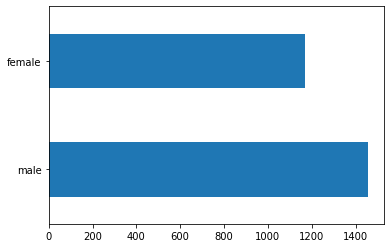

In [194]:
df[df.lictype.str.contains('Property Tax Appraiser', na=False)].gender.value_counts().plot(kind='barh')

In [184]:
df[df.lictype.str.contains('Tow', na=False)].gender.value_counts()

male      16587
female      941
Name: gender, dtype: int64

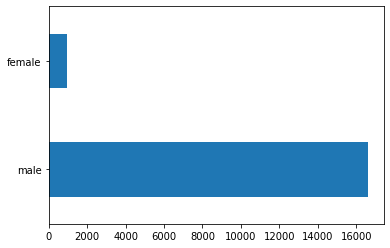

In [193]:
df[df.lictype.str.contains('Tow', na=False)].gender.value_counts().plot(kind='barh')

(By the way, what are those tow truck jobs?)

In [187]:
df[df.lictype.str.contains('Tow', na=False)].lictype.value_counts()

Tow Truck Operator (Incident Management)    7804
Tow Truck Operator (Consent Tow)            6703
Dual Towing Operator(IM)/VSF Employee       4173
Tow Truck Operator (Private Property)        352
Dual Towing Operator(CT)/VSF Employee        188
Dual Towing Operator(PP)/VSF Employee         68
Tow Truck Operator Trainee                    53
Tow Operator CE Provider                      21
Name: lictype, dtype: int64

## 33. Graph them!

And let's **give them titles** so we know which is which.

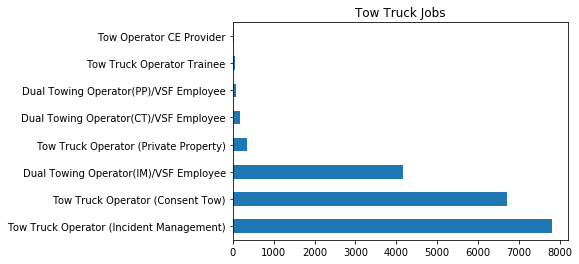

In [191]:
df[df.lictype.str.contains('Tow', na=False)].lictype.value_counts().plot(kind='barh', title='Tow Truck Jobs')

## 34. Calcuate the gender bias for profession

I spent like an hour on this and then realized a super easy way to do it. Welcome to programming! I'll do this part for you.

In [197]:
# So when you do .value_counts(), it gives you an index and a value
df[df['gender'] == 'male'].lictype.value_counts().head()

Apprentice Electrician    92786
Journeyman Electrician    35303
A/C Technician            24293
Master Electrician        15716
Cosmetology Operator      13909
Name: lictype, dtype: int64

We did `pd.concat` to combine dataframes, but you can also use it to combine series (like the results of `value_counts()`). If you give it a few `value_counts()` and give it some column names it'll make something real nice.

In [278]:
# All of the values_counts() we will be combining

total = df.lictype.value_counts()
male = df[df['gender'] == 'male'].lictype.value_counts()
female = df[df['gender'] == 'female'].lictype.value_counts()
unknown = df[df['gender'].isnull()].lictype.value_counts()
known = 100 - (unknown / total * 100)

vc_series = [
    df.lictype.value_counts(),
    df[df['gender'] == 'male'].lictype.value_counts(),
    male/total * 100,
    df[df['gender'] == 'female'].lictype.value_counts(),
    female/total * 100,
    df[df['gender'].isnull()].lictype.value_counts(),
    known
]
# You need axis=1 so it combines them as columns
gender_df = pd.concat(vc_series, axis=1)
gender_df.head()

C:\Users\sawye\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,lictype,lictype,lictype,lictype,lictype,lictype,lictype
A/C CE Provider,56,2.0,3.571429,NaN,NaN,54.0,3.571429
A/C Contractor,16376,876.0,5.349292,188.0,1.148021,15312.0,6.497313
A/C Technician,27959,24293.0,86.887943,921.0,3.294109,2745.0,90.182052
Appliance Installation Contractor,668,13.0,1.946108,6.0,0.898204,649.0,2.844311
Appliance Installer,1960,1809.0,92.295918,65.0,3.316327,86.0,95.612245


In [279]:
# Turn "A/C Contractor" etc into an actual column instead of an index
gender_df.reset_index(inplace=True)
gender_df.head()

,index,lictype,lictype,lictype,lictype,lictype,lictype,lictype
0,A/C CE Provider,56,2.0,3.571429,NaN,NaN,54.0,3.571429
1,A/C Contractor,16376,876.0,5.349292,188.0,1.148021,15312.0,6.497313
2,A/C Technician,27959,24293.0,86.887943,921.0,3.294109,2745.0,90.182052
3,Appliance Installation Contractor,668,13.0,1.946108,6.0,0.898204,649.0,2.844311
4,Appliance Installer,1960,1809.0,92.295918,65.0,3.316327,86.0,95.612245


In [280]:
# Rename the columns appropriately
gender_df.columns = ["license", "total", "male", "% male", "female", "% female", "unknown","% known",]
# Clean up the NaN by replacing them with zeroes
gender_df.fillna(0, inplace=True)
gender_df.head()

,license,total,male,% male,female,% female,unknown,% known
0,A/C CE Provider,56,2.0,3.571429,0.0,0.000000,54.0,3.571429
1,A/C Contractor,16376,876.0,5.349292,188.0,1.148021,15312.0,6.497313
2,A/C Technician,27959,24293.0,86.887943,921.0,3.294109,2745.0,90.182052
3,Appliance Installation Contractor,668,13.0,1.946108,6.0,0.898204,649.0,2.844311
4,Appliance Installer,1960,1809.0,92.295918,65.0,3.316327,86.0,95.612245


## 35. Add new columns for total licenses, percent known (not percent unknown!), percent male (of known), percent female (of known)

And replace any `NaN`s with `0`.

<h2 style="color: lightblue;"> I added it into the code above </h2>

## 35. What 10 licenses with more than 2,000 people and over 75% known has the most male owners? The most female?

In [317]:
gender_df[(gender_df['total'].astype(int) > 2000) & (gender_df['% known'] > 75)].male.sort_values(ascending=False).license
# [gender_df['male'].sort_values(ascending=False)]

AttributeError: 'Series' object has no attribute 'license'

## 36. Let's say you have to call a few people about being in a profession dominated by the other gender. What are their phone numbers?

This will involve doing some research in one dataframe, then the other one. I didn't put an answer here because I'm interested in what you come up with!

## PART FIVE: Violations

### 37. Read in **violations.csv** as `violations_df`, make sure it looks right

### 38. Combine with your original licenses dataset dataframe to get phone numbers and addresses for each violation. Check that it is 90 rows, 28 columns.

## 39. Find each violation involving a failure with records. Use a regular expression.

## 40. How much money was each fine? Use a regular expression and .str.extract (we talked about it before!)

Unfortunately large and helpful troubleshooting tip: `$` means "end of a line" in regex, so `.extract` isn't going to accept it as a dollar sign. You need to escape it by using `\$` instead.

## 41. Clean those results (no commas, no dollar signs, and it should be an integer) and save it to a new column called `fine`

`.replace` is for *entire cells*, you're interested in `.str.replace`, which treats each value like a string, not like a... pandas thing.

`.astype(int)` will convert it into an integer for you.

## 42. Which orders results in the top fines?

## 43. Are you still here???

I'm sure impressed.